In [ ]:
import pandas as pd
import glob

# Lista de idiomas y su mapeo a números
idiomas = ['spa', 'eng', 'deu', 'por', 'fra', 'ita', 'pol', 'swe', 'ces', 'nno']
idioma_a_entero = {idioma: idx for idx, idioma in enumerate(idiomas)}

# Ruta donde se encuentran los archivos
ruta_archivos = "*.tsv"  # Ajusta la ruta según tu estructura de carpetas

# Leer todos los archivos TSV
archivos = glob.glob(ruta_archivos)
dataframes = []

for archivo in archivos:
    # Cargar el archivo TSV
    df = pd.read_csv(archivo, sep='\t', header=None, names=['id', 'idioma', 'frase'])
    # Eliminar la primera columna ('id')
    df = df.drop(columns=['id'])
    # Sustituir etiquetas de texto por enteros
    df['idioma'] = df['idioma'].map(idioma_a_entero)

    df.head()
    dataframes.append(df)

# Concatenar todos los DataFrames
dataset = pd.concat(dataframes, ignore_index=True)

# Guardar el nuevo dataset en un archivo TSV
ruta_salida = "dataset_combinado.tsv"
dataset.to_csv(ruta_salida, sep='\t', index=False, header=False)

print(f"Dataset combinado guardado en: {ruta_salida}")



Dataset combinado guardado en: dataset_combinado.tsv


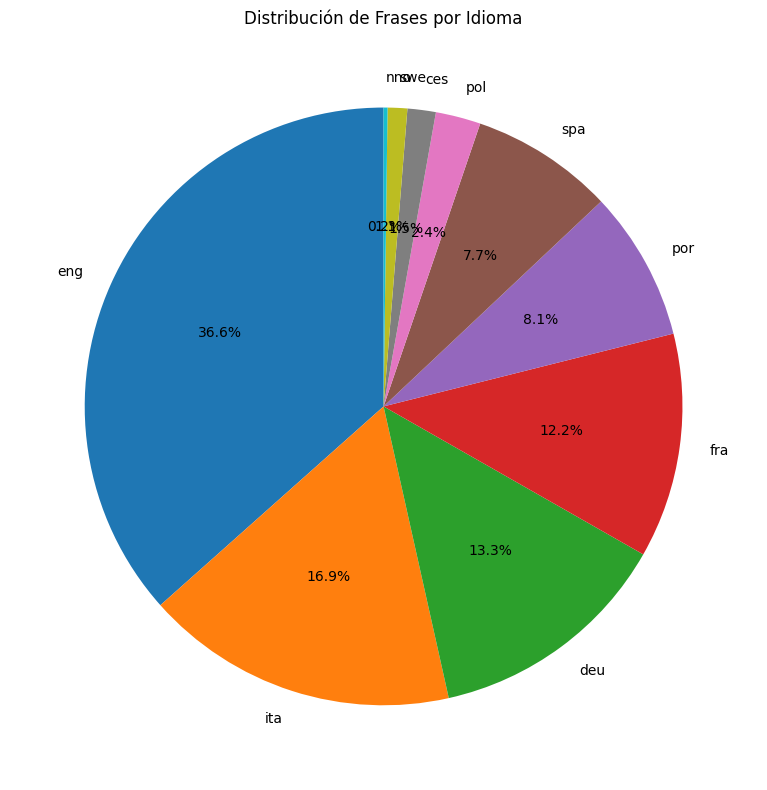

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

entero_a_idioma = {v: k for k, v in idioma_a_entero.items()}  # Invertir el diccionario

# Cargar el dataset
ruta_dataset = "dataset_combinado.tsv"  # Cambia esto por la ruta real de tu archivo
columnas = ['idioma', 'frase']  # Ajusta los nombres según las columnas de tu archivo
dataset_idiomas = pd.read_csv(ruta_dataset, sep='\t', names=columnas, header=None)

# Contar las ocurrencias de cada idioma
conteo_idiomas = dataset_idiomas['idioma'].value_counts()

# Mapear las etiquetas numéricas a nombres de idiomas
conteo_idiomas.index = conteo_idiomas.index.map(entero_a_idioma)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
conteo_idiomas.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    cmap='tab10',
    ylabel=''  # Elimina la etiqueta del eje Y
)
plt.title('Distribución de Frases por Idioma')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import re

# Lista de signos de puntuación relevantes por idioma
punctuation_rules = {
    "0": r"[.,;:¿?¡!\"']",
    "1": r"[.,;:!?\"']",
    "2": r"[.,;:!?\"']",
    "3": r"[.,;:!?\"']",
    "4": r"[.,;:!?\"']",
    "5": r"[.,;:!?\"']",
    "6": r"[.,;:!?\"']",
    "7": r"[.,;:!?\"']",
    "8": r"[.,;:!?\"']",
    "9": r"[.,;:!?\"']",
}

# Función para preprocesar texto según idioma
def preprocess_text(text, lang):
    if pd.isna(text):  # Manejar valores NaN
        return ""

    # 1. Transformar a minúsculas
    text = text.lower()

    # 2. Eliminar comillas y símbolos específicos
    text = re.sub(r'[""„”\@$/€_]', "", text)

    # 3. Mantener signos de puntuación relevantes separados por espacio
    punct = punctuation_rules.get(lang, r"[.,;:!?\"']")
    text = re.sub(rf"({punct})", r" \1 ", text)

    # 4. Eliminar espacios múltiples
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Cargar el dataset
ruta_dataset = "dataset_combinado.tsv"  # Cambia esto por la ruta real de tu archivo
columnas = ['idioma', 'frase']  # Ajusta los nombres según las columnas de tu archivo
dataset_preprocesado = pd.read_csv(ruta_dataset, sep='\t', names=columnas, header=None)

# Aplicar preprocesamiento
dataset_preprocesado['frase'] = dataset_preprocesado.apply(lambda row: preprocess_text(row['frase'], str(row['idioma'])), axis=1)

# Eliminar filas que contienen números en la columna de texto
dataset_preprocesado = dataset_preprocesado[~dataset_preprocesado['frase'].str.contains(r"\d", na=False)]

# Guardar el dataset procesado
ruta_salida = "dataset_procesado.tsv"
dataset_preprocesado.to_csv(ruta_salida, sep='\t', index=False, header=False)

print(f"Dataset procesado guardado en: {ruta_salida}")


Dataset procesado guardado en: dataset_procesado.tsv
